In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2)

In [9]:
df = pd.read_csv('data/customers.csv', sep=';')
df = df.drop(columns=['duration', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'contact'])
df['balance_k'] = df.balance / 1000
df.head()

,age,job,marital,education,default,balance,housing,loan,y,balance_k
0,58,management,married,tertiary,no,2143,yes,no,no,2.143
1,44,technician,single,secondary,no,29,yes,no,no,0.029
2,33,entrepreneur,married,secondary,no,2,yes,yes,no,0.002
3,47,blue-collar,married,unknown,no,1506,yes,no,no,1.506
4,33,unknown,single,unknown,no,1,no,no,no,0.001


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   y          45211 non-null  object 
 9   balance_k  45211 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 3.4+ MB


In [11]:
df[['age', 'balance']].describe().round(2)

,age,balance
count,45211.00,45211.00
mean,40.94,1362.27
std,10.62,3044.77
min,18.00,-8019.00
25%,33.00,72.00
50%,39.00,448.00
75%,48.00,1428.00
max,95.00,102127.00


## Exploring the range and distribution

Age skewness of 0.68 and kurtois of 0.32
Balance skewness of 8.36 and kurtois of 140.75


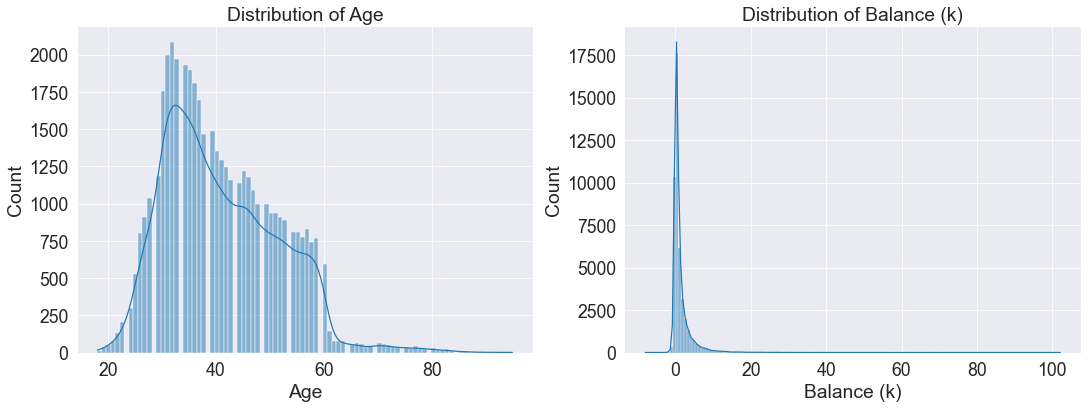

In [12]:
print('Age skewness of {:.2f} and kurtois of {:.2f}'.format(df.age.skew(), df.age.kurt()))
print('Balance skewness of {:.2f} and kurtois of {:.2f}'.format(df.balance.skew(), df.balance.kurt()))

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=df, x='age', kde=True, ax=ax[0]).set(title='Distribution of Age', xlabel='Age')
sns.histplot(data=df, x='balance_k', kde=True, bins=150, ax=ax[1]).set(title='Distribution of Balance (k)', xlabel='Balance (k)');

Does not follow a normal distribution and has outliers. It is not yet clear whether we should standardize or normalize.

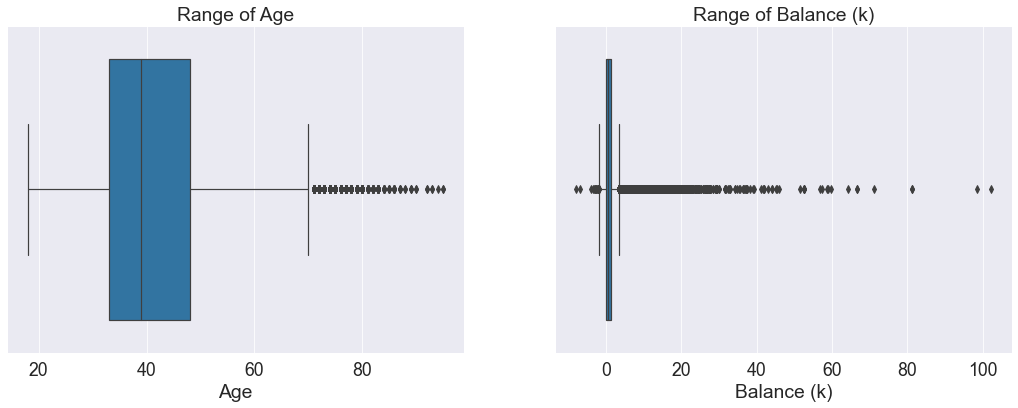

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(x=df.age, ax=ax[0]).set(title='Range of Age', xlabel='Age')
sns.boxplot(x=df.balance_k, ax=ax[1]).set(title='Range of Balance (k)', xlabel='Balance (k)');

## Understanding the correlation

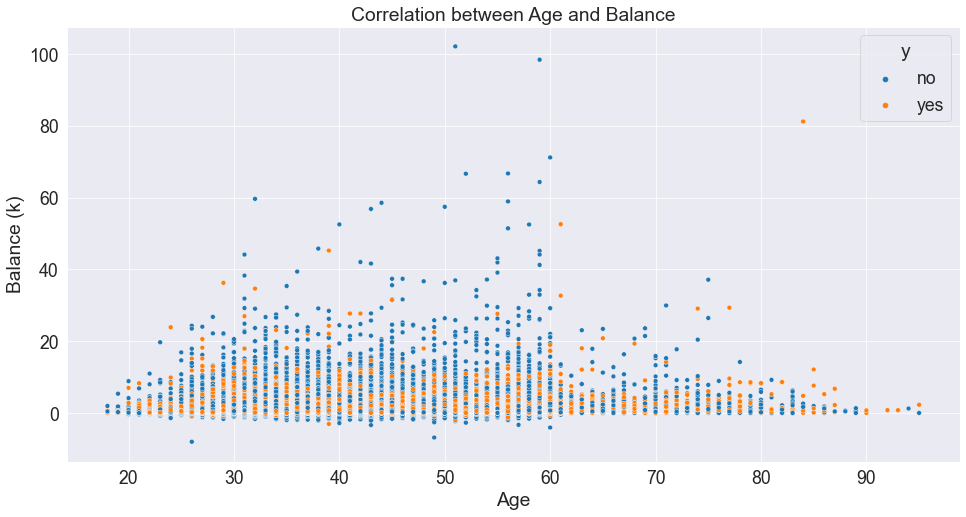

In [14]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='age', y='balance_k', hue='y').set(title='Correlation between Age and Balance', xlabel='Age', ylabel='Balance (k)');

There is very little correlation between age and balance, i.e. various ages have varying balance amounts in their accounts. You could argue slightly that ages over 60 exceed 10k far less that ages under and including 60.

You could hypothesize this and say that over 60's are less likely to subscribe as they have less money lying idle and may need easy access to their funds as opposed to committing the money to a long term bank deposit.

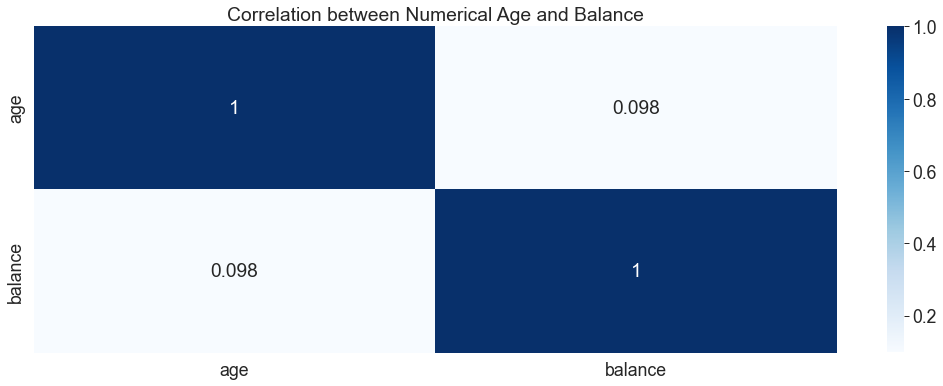

In [21]:
plt.figure(figsize=(18, 6))
plt.title('Correlation between Numerical Age and Balance')
sns.heatmap(df[['age', 'balance']].corr(method='pearson'), annot=True, cmap='Blues');